Dataset dimention:  (517, 30)


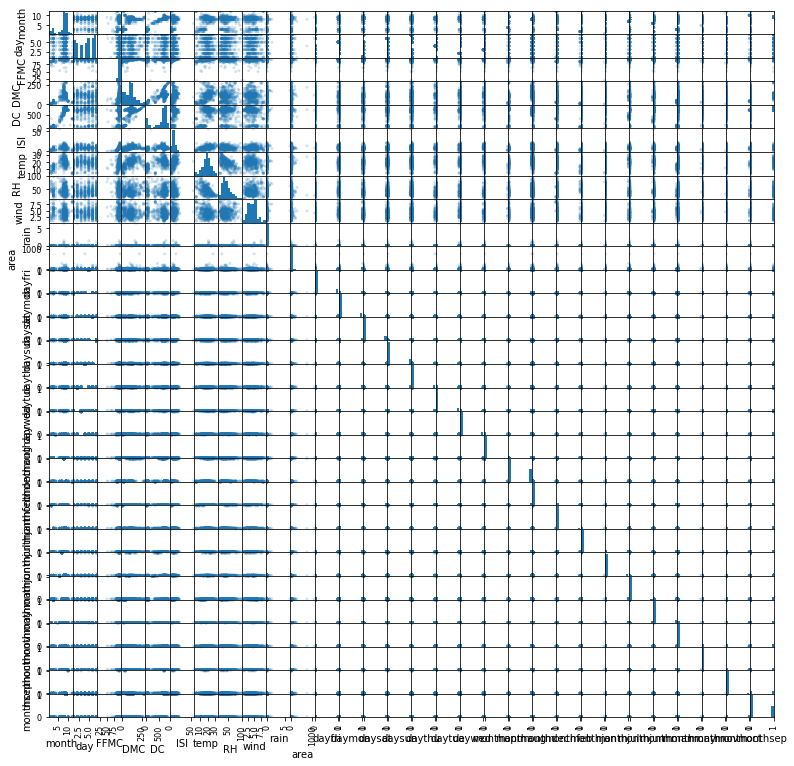

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#importing the data set:
dataframes = pd.read_csv("forestfires.csv")

#data proprocessing:

#replacing string values by numerical values:
dataframes.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                        (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataframes.day.replace(('mon','tue','wed','thu','fri','sat','sun'),
                       (1,2,3,4,5,6,7), inplace=True)
train_cv = 1*dataframes
#shape of our data:
print('Dataset dimention: ',dataframes.shape)
#visualize the data for analysis:
scatter=scatter_matrix(dataframes, alpha=0.2, figsize=(13, 13), diagonal='hist', grid=True)
plt.show()

In [4]:
dataframes.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

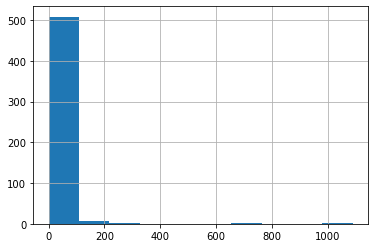

In [5]:
dataframes['area'].hist()

In [6]:
dataframes['area'].value_counts().sort_index()

0.00       247
0.09         1
0.17         1
0.21         1
0.24         1
          ... 
200.94       1
212.88       1
278.53       1
746.28       1
1090.84      1
Name: area, Length: 251, dtype: int64

In [7]:
dataframes['area'].var()

4052.063224823429

In [8]:
#correlation to area:
dataframes.corr()['area']

month       0.056496
day         0.023226
FFMC        0.040122
DMC         0.072994
DC          0.049383
ISI         0.008258
temp        0.097844
RH         -0.075519
wind        0.012317
rain       -0.007366
area        1.000000
dayfri     -0.052911
daymon     -0.021206
daysat      0.087868
daysun     -0.020463
daythu      0.020121
daytue     -0.001333
daywed     -0.011452
monthapr   -0.008280
monthaug   -0.004187
monthdec    0.001010
monthfeb   -0.020732
monthjan   -0.012589
monthjul    0.006149
monthjun   -0.020314
monthmar   -0.045596
monthmay    0.006264
monthnov   -0.008893
monthoct   -0.016878
monthsep    0.056573
Name: area, dtype: float64

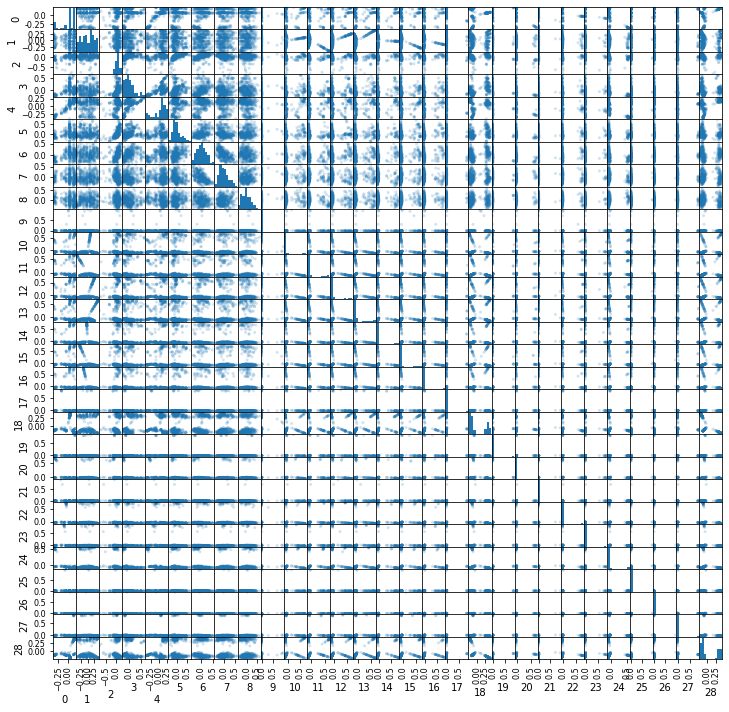

In [9]:
#continue preprocessing:

from sklearn.model_selection import train_test_split
# split original data into training and test set 80/20
train, test = train_test_split(dataframes, test_size=0.2)

# separate X and target for both train and test
train_target = train.pop('area')
test_target = test.pop('area')

from sklearn.preprocessing import StandardScaler, Normalizer
#perform scaling and normalize the data:
ss = StandardScaler()
train = ss.fit_transform(train)
test = ss.transform(test)

nm = Normalizer()
train = nm.fit_transform(train)
test = nm.transform(test)

#revisualize our training data:
from pandas.plotting._misc import scatter_matrix
scatter=scatter_matrix(pd.DataFrame(train), alpha=0.2, figsize=(12, 12), diagonal='hist')
plt.show()

In [15]:
# Regression
models = []
#linear models:
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
models.append(('Linear Regression', LinearRegression(fit_intercept=True)))
models.append(('Ridge', Ridge(alpha=1, fit_intercept=True, normalize=True)))
models.append(('Lasso', Lasso(alpha=1, fit_intercept=True, normalize=True)))
models.append(('ElasticNet', ElasticNet(normalize=True)))
#SVM
from sklearn.svm import SVR
models.append(('SVM', SVR(kernel='rbf', C=1, gamma='auto')))
#K-nearest neighbor
from sklearn.neighbors import KNeighborsRegressor
models.append(('KNN', KNeighborsRegressor(n_neighbors=10, leaf_size=50)))
#random forest related models:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
models.append(('Bagging', BaggingRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Extra Trees', ExtraTreesRegressor()))
#decision tree
from sklearn.tree import DecisionTreeRegressor
models.append(('Decision Tree', DecisionTreeRegressor()))
#fully connected neural network
from sklearn.neural_network import MLPRegressor
models.append(('reluNN', MLPRegressor(solver = 'sgd',activation = 'relu', hidden_layer_sizes=(5,10),
                   verbose = False, max_iter=9999, tol=1e-6, alpha = 0.00001)))
models.append(('tanhNN', MLPRegressor(solver = 'sgd',activation = 'tanh', hidden_layer_sizes=(5,10),
                   verbose = False, max_iter=9999, tol=1e-6, alpha = 0.00001)))

In [16]:
#fit and evaluate the model
from sklearn.metrics import mean_absolute_error
meanError=[]
print('mean absolute error:')
for name, rgn in models:
    rgn.fit(train, train_target)
    print(name)
    print(mean_absolute_error(rgn.predict(test), test_target))
    meanError.append((name, mean_absolute_error(rgn.predict(test), test_target)))
meanError=np.array(meanError)

mean absolute error:
Linear Regression
17.25514332709199
Ridge
14.348548455274916
Lasso
15.378462236915624
ElasticNet
15.378462236915624
SVM
9.351042648109724
KNN
15.355596153846154
Bagging
17.327404807692307
Random Forest
15.916733099816849
Extra Trees
15.968489102564101
Decision Tree
14.188125000000001
reluNN
45.81827239997213
tanhNN
12.269416493858763


In [17]:
from sklearn.model_selection import cross_val_score
target_cv = train_cv.pop('area')

In [18]:
for name, rgn in models:
  print(name)
  temp = cross_val_score(rgn, train_cv, target_cv, cv=100, scoring='neg_mean_absolute_error')
  print(np.average(abs(temp)))

Linear Regression
21.440957677516284
Ridge
19.34905281508192
Lasso
18.845695749908263
ElasticNet
18.845695749908263
SVM
13.284179273408233
KNN
21.104956666666666
Bagging
24.54405418650794
Random Forest
23.154401234920634
Extra Trees
23.410824683333328
Decision Tree
25.677336666666665
reluNN
4.123398082207177e+59
tanhNN
18.806994094990074
